## **PLOTS**  
### *By Jyreneah Angel and Nicole Grace Joligon* 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import plotly.graph_objects as go
from matplotlib.gridspec import GridSpec
import numpy as np

## **BAR GRAPH**

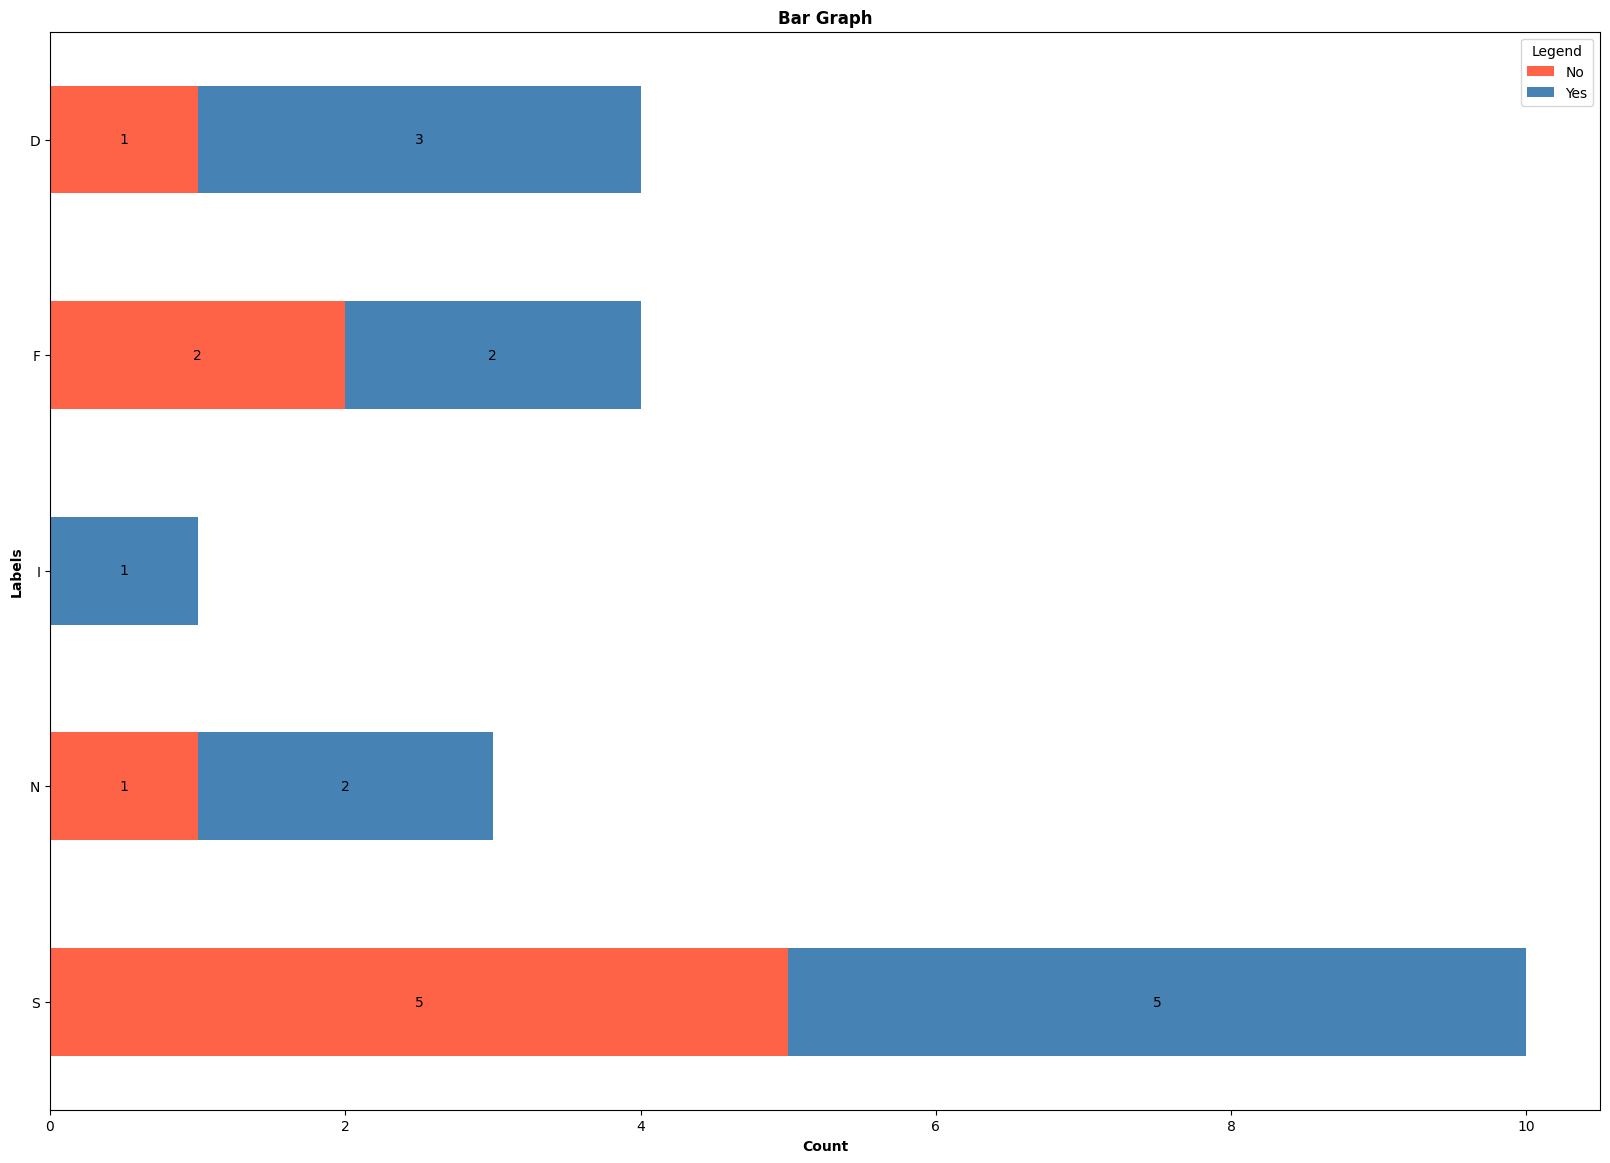

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Load dataset
bar_df = pd.read_csv("bar_assignment.csv")

# Process data
table_counts = bar_df.groupby(['LABEL', 'COUNT']).size().unstack(fill_value=0)
table_counts = table_counts.rename(columns={0: 'No', 1: 'Yes'}).sort_index(ascending=False)
table_counts = table_counts[['No', 'Yes']]

# Create figure and axis
fig, ax = plt.subplots(figsize=(20, 14))

table_counts.plot(kind='barh', stacked=True, ax=ax, color=['#FF6347', '#4682B4'])

# Add labels on bars
for container in ax.containers:
    labels = [int(v) if v > 0 else '' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center')

# Customize plot
ax.set_title('Bar Graph', fontweight='bold')
ax.set_xlabel('Count', fontweight='bold')
ax.set_ylabel('Labels', fontweight='bold')
ax.legend(title='Legend', labels=['No', 'Yes'])

plt.show()

## **Sankey Diagram**


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Load dataset
sankey_df = pd.read_csv('sankey_assignment.csv')

# Transform data for Sankey diagram
df_prep = sankey_df.melt(id_vars=['LABEL'], var_name='source', value_name='value')
df_prep.rename(columns={'LABEL': 'target'}, inplace=True)
df_prep = df_prep[['source', 'target', 'value']]

# Split data into two layers
df_layer1 = df_prep.iloc[:40]
df_layer2 = df_prep.iloc[40:].copy()
df_layer2.rename(columns={'target': 'source', 'source': 'target'}, inplace=True)

# Merge layers
links = pd.concat([df_layer1, df_layer2], ignore_index=True)

# Create unique node mapping
unique_nodes = pd.unique(links[['source', 'target']].values.ravel())
node_mapping = {node: idx for idx, node in enumerate(unique_nodes)}

# Map source and target to indices
links['source'] = links['source'].map(node_mapping)
links['target'] = links['target'].map(node_mapping)

# Convert to dictionary format
links_dict = links.to_dict(orient='list')

# Define node colors
hex_colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f",
    "#bcbd22", "#17becf", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5", "#c49c94", "#f7b6d2"
]
node_colors = [hex_colors[i % len(hex_colors)] for i in range(len(unique_nodes))]

# Create Sankey diagram
fig = go.Figure(
    data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color='black', width=0.5),
            label=unique_nodes,
            color=node_colors,
        ),
        link=dict(
            source=links_dict['source'],
            target=links_dict['target'],
            value=links_dict['value'],
            color=[node_colors[src] for src in links_dict['source']]
        )
    )]
)

# Update layout
fig.update_layout(title_text="Sankey Diagram", font_size=10)
fig.show()


## **Network Graph**

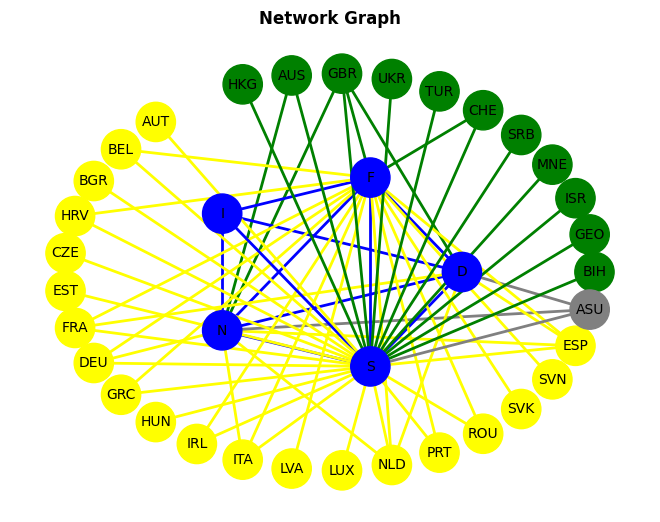

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.gridspec import GridSpec
from IPython.display import display
from PIL import Image

# Load the CSV file
data = pd.read_csv("networks_assignment.csv")

# Create a graph
G = nx.Graph()
nodes = data.columns[1:].tolist()
G.add_nodes_from(nodes)

# Add edges based on the CSV data
for _, row in data.iterrows():
    node = row['LABELS']
    for target, value in row[1:].items():
        if value > 0:
            G.add_edge(node, target, weight=value)

# Define positions for pentagram nodes
pentagon_nodes = ['D', 'F', 'I', 'N', 'S']
angle = np.linspace(0, 2 * np.pi, len(pentagon_nodes), endpoint=False)
pos = {node: (np.cos(a), np.sin(a)) for node, a in zip(pentagon_nodes, angle)}

# Define positions for outer nodes
outer_radius = 2
yellow_nodes = ['AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']
green_nodes = ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA']
gray_nodes = ['ASU']
outer_nodes = green_nodes + yellow_nodes + gray_nodes
outer_angle = np.linspace(0, 2 * np.pi, len(outer_nodes), endpoint=False)
pos.update({node: (outer_radius * np.cos(a), outer_radius * np.sin(a)) for node, a in zip(outer_nodes, outer_angle)})

# Default position for unassigned nodes
for node in nodes:
    if node not in pos:
        pos[node] = (0, 0)

# Define node colors
color_map = {
    **dict.fromkeys(pentagon_nodes, 'blue'),
    **dict.fromkeys(green_nodes, 'green'),
    **dict.fromkeys(yellow_nodes, 'yellow'),
    'ASU': 'gray'
}
node_colors = [color_map.get(node, 'gray') for node in G.nodes()]

# Filter displayed nodes and edges
display_nodes = pentagon_nodes + outer_nodes
display_edges = [(u, v) for u, v, d in G.edges(data=True) if u in display_nodes and v in display_nodes]
H = G.edge_subgraph(display_edges).copy()

# Define edge colors
edge_colors = ['yellow' if v in yellow_nodes else 'green' if v in green_nodes else 'gray' if v in gray_nodes else 'blue' for u, v in H.edges()]

# Draw the graph
plt.figure()
nx.draw(H, {node: pos[node] for node in H.nodes()}, with_labels=True, node_color=[color_map[node] for node in H.nodes()], node_size=800, font_size=10, edge_color=edge_colors, width=2)
plt.title('Network Graph', fontweight='bold')
plt.show()
